In [1]:
from EBL_forecast import * 

Note: redshifts have been re-sorted (earliest first)


In [2]:
rho_crit = (2.77536627e11*(u.Msun.to(u.kg)*u.kg*u.Mpc**-3) * cu.c**2 ).to(u.erg/u.Mpc**3)

# from Jose's paper
f_gg = 1 # good for axions
F_g = 0 # sets stimulated decay due to CMB - check different values
f_DM = 1 # DM fraction 

decay_DM = 1e-40 *u.s**-1 #np.logspace(-50,-20)* u.s**-1

Text(0, 0.5, '$\\nu_{\\rm obs}$')

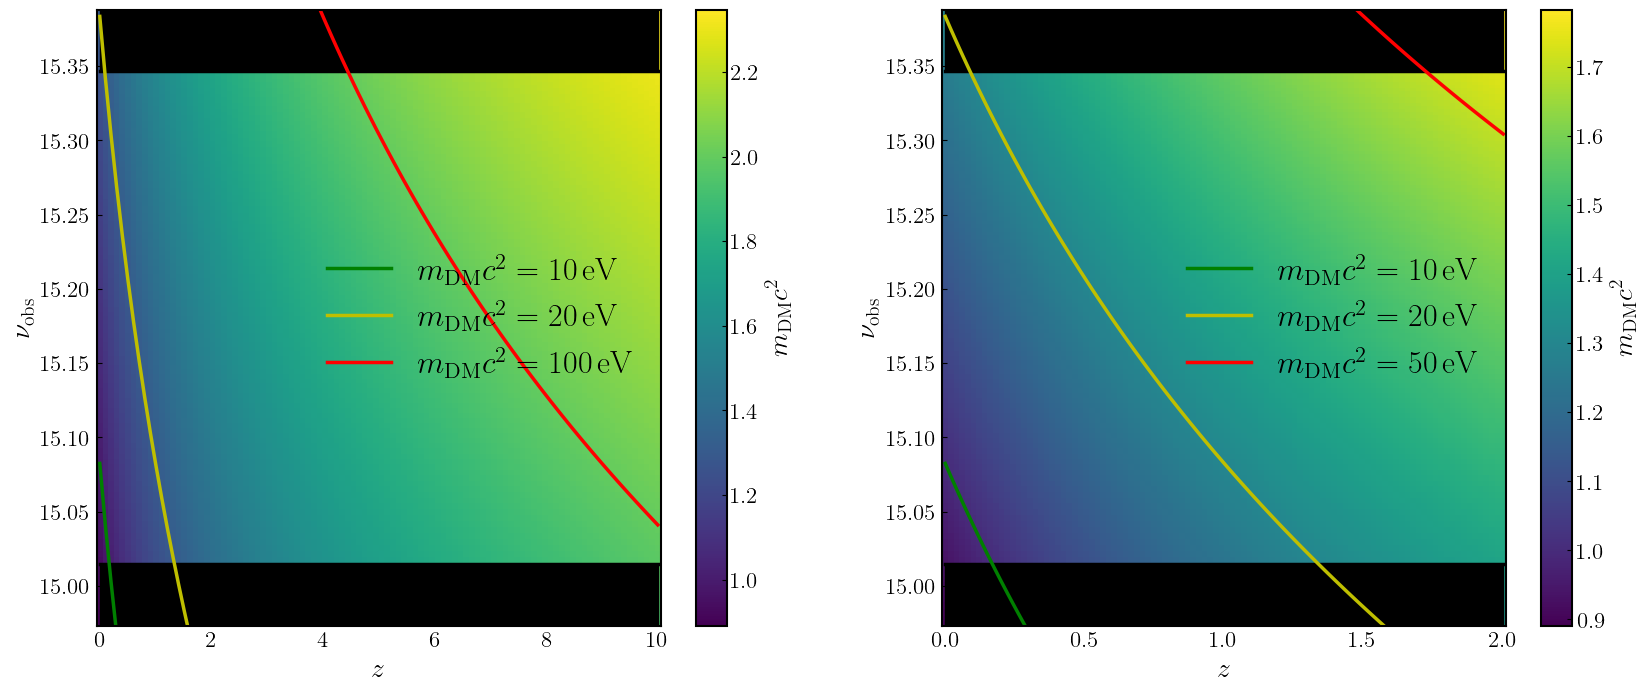

In [3]:
nu_obs_max = nu_max_gFUV
nu_obs_min = nu_min_US

nnu = 150
nz = 100

#mc2_DM = np.logspace(-3,3,nm) *u.eV
nu_DM_obs = np.linspace(nu_obs_min/1.1,nu_obs_max*1.1,nnu)
z_vals = np.linspace(0,10,nz)

#mc2_DM_matr = mc2_DM[:,np.newaxis]*np.ones((nm,nz))
z_vals_matr = z_vals[:,np.newaxis]*np.ones((nz,nnu))
nu_DM_obs_matr = nu_DM_obs[np.newaxis,:]*np.ones((nz,nnu))

mc2_DM = ((4*np.pi*cu.hbar) * (nu_DM_obs_matr*(1+z_vals_matr))).to(u.eV)

#nu_DM_rest = (mc2_DM_matr / (4*np.pi*cu.hbar)).to(u.Hz)
#nu_DM_obs = nu_DM_rest / (1+z_vals_matr)

plt.figure(figsize=(20,8))
plt.subplot(121)
plt.pcolormesh(z_vals, np.log10(nu_DM_obs.value),np.log10(mc2_DM.value).T)  

plt.plot(z_vals,np.log10(nu_obs_min.value)*np.ones(len(z_vals)),'k')
plt.plot(z_vals,np.log10(nu_obs_max.value)*np.ones(len(z_vals)),'k')

nu_obs_10eV = (10*u.eV / (4*np.pi*cu.hbar)).to(u.Hz) / (1+z_vals)
nu_obs_20eV = (20*u.eV / (4*np.pi*cu.hbar)).to(u.Hz) / (1+z_vals)
nu_obs_100eV = (100*u.eV / (4*np.pi*cu.hbar)).to(u.Hz) / (1+z_vals)

plt.plot(z_vals,np.log10(nu_obs_10eV.value),'g',label=r'$m_{\rm DM}c^2 = 10\,{\rm eV}$')
plt.plot(z_vals,np.log10(nu_obs_20eV.value),'y',label=r'$m_{\rm DM}c^2 = 20\,{\rm eV}$')
plt.plot(z_vals,np.log10(nu_obs_100eV.value),'r',label=r'$m_{\rm DM}c^2 = 100\,{\rm eV}$')

plt.ylim(np.log10(nu_DM_obs.value)[0],np.log10(nu_DM_obs.value)[-1])

plt.legend(loc=7)

plt.fill_between(z_vals,np.log10(nu_obs_max.value),y2=np.log10(nu_obs_max.value*1.1),color='k')
plt.fill_between(z_vals,np.log10(nu_obs_min.value/1.1),y2=np.log10(nu_obs_min.value),color='k')

plt.colorbar(label=r'$m_{\rm DM}c^2$')
plt.xlabel(r'$z$')
plt.ylabel(r'$\nu_{\rm obs}$')

plt.subplot(122)

nu_DM_obs = np.linspace(nu_obs_min/1.1,nu_obs_max*1.1,nnu)
z_vals = np.linspace(0,2.,nz)

nu_obs_10eV = (10*u.eV / (4*np.pi*cu.hbar)).to(u.Hz) / (1+z_vals)
nu_obs_20eV = (20*u.eV / (4*np.pi*cu.hbar)).to(u.Hz) / (1+z_vals)
nu_obs_50eV = (50*u.eV / (4*np.pi*cu.hbar)).to(u.Hz) / (1+z_vals)

z_vals_matr = z_vals[:,np.newaxis]*np.ones((nz,nnu))
nu_DM_obs_matr = nu_DM_obs[np.newaxis,:]*np.ones((nz,nnu))

mc2_DM = ((4*np.pi*cu.hbar) * (nu_DM_obs_matr*(1+z_vals_matr))).to(u.eV)

plt.pcolormesh(z_vals, np.log10(nu_DM_obs.value),np.log10(mc2_DM.value).T)  

plt.plot(z_vals,np.log10(nu_obs_min.value)*np.ones(len(z_vals)),'k')
plt.plot(z_vals,np.log10(nu_obs_max.value)*np.ones(len(z_vals)),'k')

plt.plot(z_vals,np.log10(nu_obs_10eV.value),'g',label=r'$m_{\rm DM}c^2 = 10\,{\rm eV}$')
plt.plot(z_vals,np.log10(nu_obs_20eV.value),'y',label=r'$m_{\rm DM}c^2 = 20\,{\rm eV}$')
plt.plot(z_vals,np.log10(nu_obs_50eV.value),'r',label=r'$m_{\rm DM}c^2 = 50\,{\rm eV}$')

plt.ylim(np.log10(nu_DM_obs.value)[0],np.log10(nu_DM_obs.value)[-1])

plt.legend(loc=7)

plt.fill_between(z_vals,np.log10(nu_obs_max.value),y2=np.log10(nu_obs_max.value*1.1),color='k')
plt.fill_between(z_vals,np.log10(nu_obs_min.value/1.1),y2=np.log10(nu_obs_min.value),color='k')

plt.colorbar(label=r'$m_{\rm DM}c^2$')
plt.xlabel(r'$z$')
plt.ylabel(r'$\nu_{\rm obs}$')

In [4]:
nu_DM_rest_funct = lambda m_DM: (m_DM / (4*np.pi*cu.hbar)).to(u.Hz)
nu_DM_obs_funct = lambda m_DM, z: nu_DM_rest_funct(m_DM) / (1+z)

emissivity_intrinsic = lambda m_DM, z: (f_gg * f_DM * camb_pars.omegac * rho_crit  * light**2 * decay_DM * (1+F_g)/nu_DM_obs_funct(m_DM,z)).to(u.erg*u.s**-1*u.Hz**-1*u.Mpc**-3) # * (1+z)**3 -  need to be weighted by absorptions

emissivity_obs = lambda m_DM, z: emissivity_intrinsic(m_DM,z) * np.exp(-tau_Lya(lambda_from_nu(nu_DM_obs_funct(m_DM,z)),z))


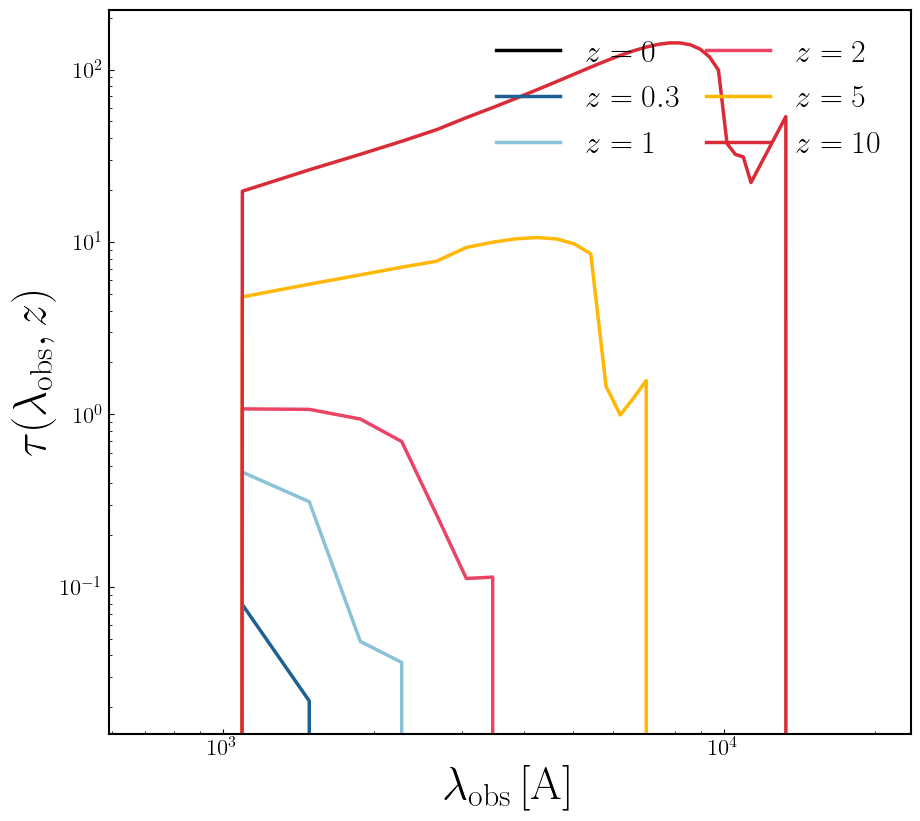

In [5]:
plot_tau()

In [6]:
m_DM_vals = np.linspace(10,50,100)*u.eV
z_vals = np.linspace(0,2,10)

nu_DM_obs_vals = np.zeros((len(z_vals),len(m_DM_vals)))
DM_intr_em_vals = np.zeros((len(z_vals),len(m_DM_vals)))
DM_obs_em_vals = np.zeros((len(z_vals),len(m_DM_vals)))
for i in range(len(z_vals)):
    for j in range(len(m_DM_vals)):
        nu_DM_obs_vals[i,j] = nu_DM_obs_funct(m_DM_vals[j],z_vals[i]).value
        DM_intr_em_vals[i,j] = emissivity_intrinsic(m_DM_vals[j],z_vals[i]).value
        DM_obs_em_vals[i,j] = emissivity_obs(m_DM_vals[j],z_vals[i]).value


Text(0, 0.5, '$m_{\\rm DM}c^2$')

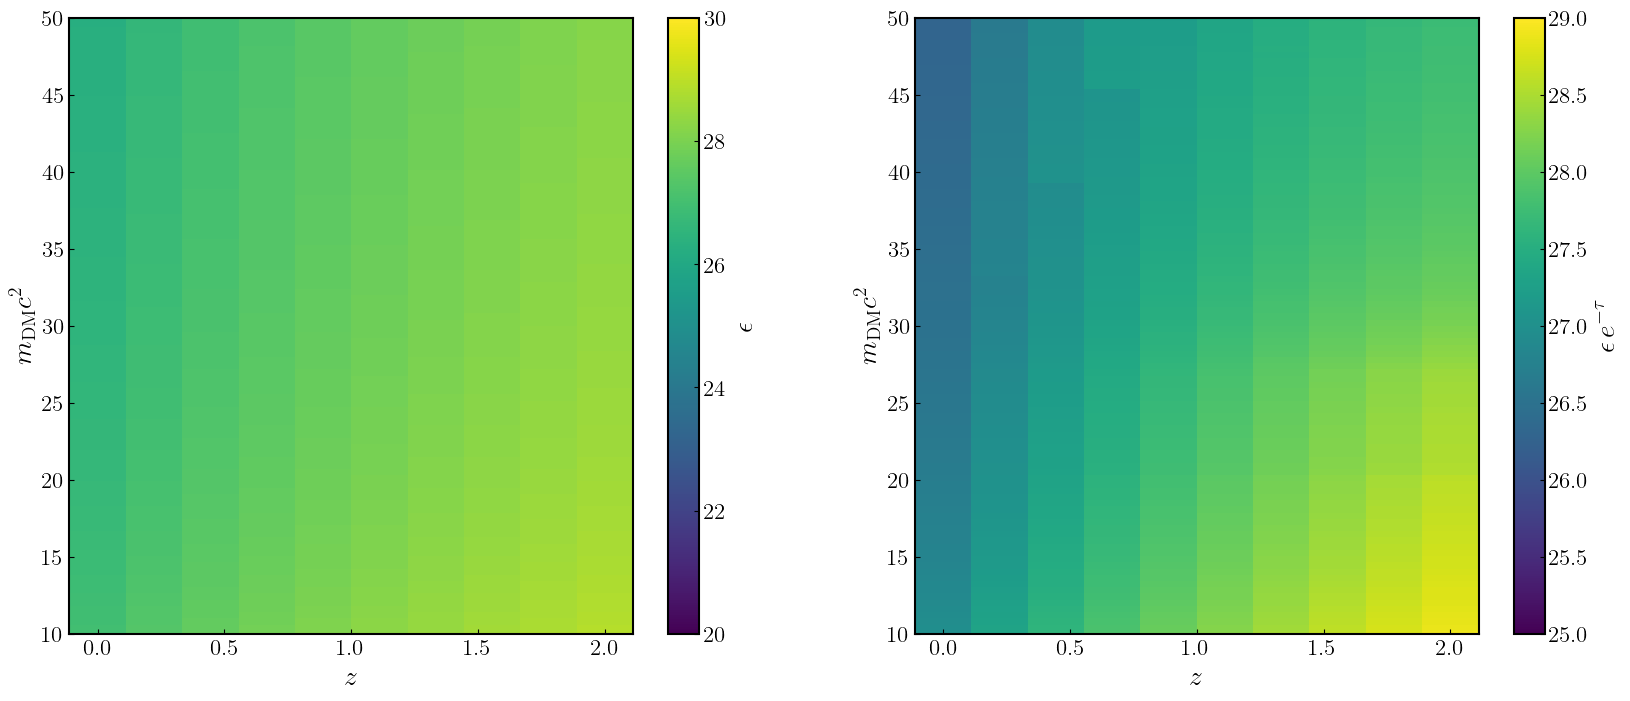

In [7]:

plt.figure(figsize=(20,8))
plt.subplot(121)

plt.pcolormesh(z_vals, (m_DM_vals.value),np.log10(DM_intr_em_vals).T,vmin=20,vmax=30)  

plt.ylim((m_DM_vals.value)[0],(m_DM_vals.value)[-1])

plt.colorbar(label=r'$\epsilon$')
plt.xlabel(r'$z$')
plt.ylabel(r'$m_{\rm DM}c^2$')

plt.subplot(122)

plt.pcolormesh(z_vals, (m_DM_vals.value),np.log10(DM_obs_em_vals).T,vmin=25,vmax=29)  

plt.ylim((m_DM_vals.value)[0],(m_DM_vals.value)[-1])

plt.colorbar(label=r'$\epsilon\,e^{-\tau}$')
plt.xlabel(r'$z$')
plt.ylabel(r'$m_{\rm DM}c^2$')

Text(0, 0.5, '$\\epsilon$')

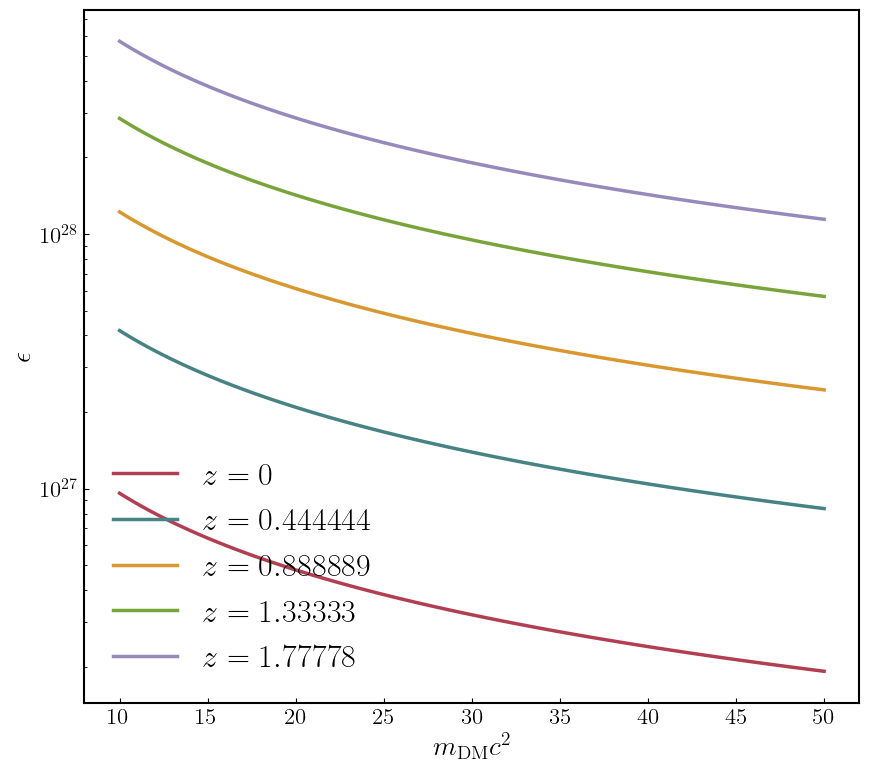

In [8]:
for i in ([0,2,4,6,8]):
    plt.semilogy(m_DM_vals,DM_intr_em_vals[i,:],label=r'$z=%g$'%z_vals[i])

plt.xlabel(r'$m_{\rm DM}c^2$')
plt.legend()
plt.ylabel(r'$\epsilon$')

Text(0, 0.5, '$\\lambda_{\\rm obs}$')

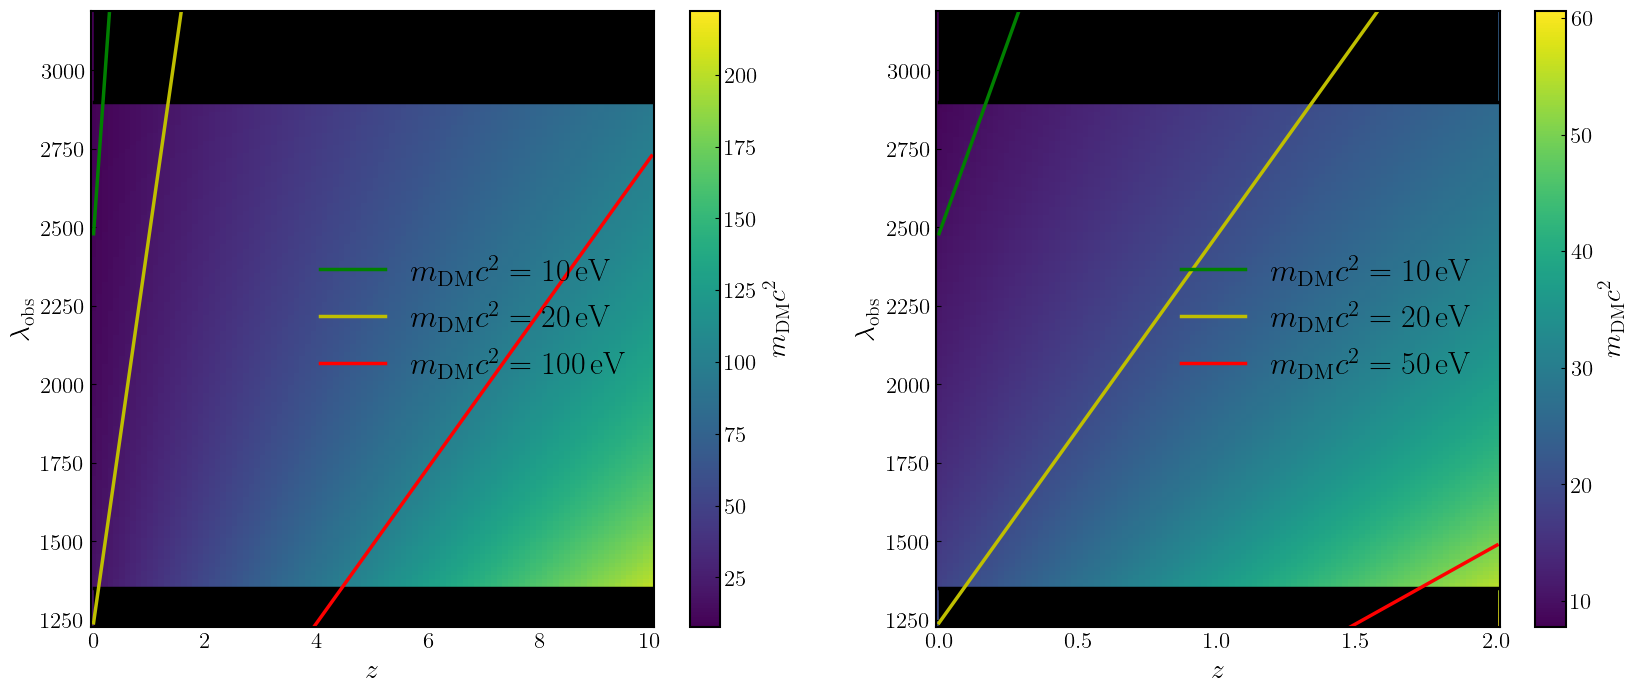

In [9]:
lambda_obs_max = lambda_from_nu(nu_min_US)
lambda_obs_min = lambda_from_nu(nu_max_gFUV)

nnu = 150
nz = 100

lambda_DM_obs = np.linspace(lambda_obs_min/1.1,lambda_obs_max*1.1,nnu)
z_vals = np.linspace(0,10,nz)

z_vals_matr = z_vals[:,np.newaxis]*np.ones((nz,nnu))
lambda_DM_obs_matr = lambda_DM_obs[np.newaxis,:]*np.ones((nz,nnu))

mc2_DM = ((4*np.pi*cu.hbar) * (nu_from_lambda(lambda_DM_obs_matr)*(1+z_vals_matr))).to(u.eV)

plt.figure(figsize=(20,8))
plt.subplot(121)
plt.pcolormesh(z_vals, (lambda_DM_obs.value),(mc2_DM.value).T)  

plt.plot(z_vals,(lambda_obs_min.value)*np.ones(len(z_vals)),'k')
plt.plot(z_vals,(lambda_obs_max.value)*np.ones(len(z_vals)),'k')

lambda_obs_10eV = lambda_from_nu((10*u.eV / (4*np.pi*cu.hbar)).to(u.Hz) / (1+z_vals))
lambda_obs_20eV = lambda_from_nu((20*u.eV / (4*np.pi*cu.hbar)).to(u.Hz) / (1+z_vals))
lambda_obs_100eV =lambda_from_nu( (100*u.eV / (4*np.pi*cu.hbar)).to(u.Hz) / (1+z_vals))

plt.plot(z_vals,(lambda_obs_10eV.value),'g',label=r'$m_{\rm DM}c^2 = 10\,{\rm eV}$')
plt.plot(z_vals,(lambda_obs_20eV.value),'y',label=r'$m_{\rm DM}c^2 = 20\,{\rm eV}$')
plt.plot(z_vals,(lambda_obs_100eV.value),'r',label=r'$m_{\rm DM}c^2 = 100\,{\rm eV}$')

plt.ylim((lambda_DM_obs.value)[0],(lambda_DM_obs.value)[-1])

plt.legend(loc=7)

plt.fill_between(z_vals,(lambda_obs_max.value),y2=(lambda_obs_max.value*1.1),color='k')
plt.fill_between(z_vals,(lambda_obs_min.value/1.1),y2=(lambda_obs_min.value),color='k')

plt.colorbar(label=r'$m_{\rm DM}c^2$')
plt.xlabel(r'$z$')
plt.ylabel(r'$\lambda_{\rm obs}$')

plt.subplot(122)

lambda_DM_obs = np.linspace(lambda_obs_min/1.1,lambda_obs_max*1.1,nnu)
z_vals = np.linspace(0,2.,nz)

lambda_obs_10eV = lambda_from_nu((10*u.eV / (4*np.pi*cu.hbar)).to(u.Hz) / (1+z_vals))
lambda_obs_20eV = lambda_from_nu((20*u.eV / (4*np.pi*cu.hbar)).to(u.Hz) / (1+z_vals))
lambda_obs_50eV = lambda_from_nu((50*u.eV / (4*np.pi*cu.hbar)).to(u.Hz) / (1+z_vals))

z_vals_matr = z_vals[:,np.newaxis]*np.ones((nz,nnu))
lambda_DM_obs_matr = lambda_DM_obs[np.newaxis,:]*np.ones((nz,nnu))

mc2_DM = ((4*np.pi*cu.hbar) * (nu_from_lambda(lambda_DM_obs_matr)*(1+z_vals_matr))).to(u.eV)

plt.pcolormesh(z_vals, (lambda_DM_obs.value),(mc2_DM.value).T)  

plt.plot(z_vals,(lambda_obs_min.value)*np.ones(len(z_vals)),'k')
plt.plot(z_vals,(lambda_obs_max.value)*np.ones(len(z_vals)),'k')

lambda_obs_20eV = lambda_from_nu((20*u.eV / (4*np.pi*cu.hbar)).to(u.Hz) / (1+z_vals))
lambda_obs_100eV =lambda_from_nu( (100*u.eV / (4*np.pi*cu.hbar)).to(u.Hz) / (1+z_vals))
lambda_obs_10eV = lambda_from_nu((10*u.eV / (4*np.pi*cu.hbar)).to(u.Hz) / (1+z_vals))

plt.plot(z_vals,(lambda_obs_10eV.value),'g',label=r'$m_{\rm DM}c^2 = 10\,{\rm eV}$')
plt.plot(z_vals,(lambda_obs_20eV.value),'y',label=r'$m_{\rm DM}c^2 = 20\,{\rm eV}$')
plt.plot(z_vals,(lambda_obs_50eV.value),'r',label=r'$m_{\rm DM}c^2 = 50\,{\rm eV}$')

plt.ylim((lambda_DM_obs.value)[0],(lambda_DM_obs.value)[-1])

plt.legend(loc=7)

plt.fill_between(z_vals,(lambda_obs_max.value),y2=(lambda_obs_max.value*1.1),color='k')
plt.fill_between(z_vals,(lambda_obs_min.value/1.1),y2=(lambda_obs_min.value),color='k')

plt.colorbar(label=r'$m_{\rm DM}c^2$')
plt.xlabel(r'$z$')
plt.ylabel(r'$\lambda_{\rm obs}$')